# Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

# Loading Model

In [3]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

#Visualising and Performing Prediction on Single image

In [5]:
!pip install opencv-python


   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 653.6 kB/s eta 0:01:00
   ---------------------------------------- 0.3/38.8 MB 2.7 MB/s eta 0:00:15
   - -------------------------------------- 1.1/38.8 MB 7.2 MB/s eta 0:00:06
   - -------------------------------------- 1.7/38.8 MB 8.9 MB/s eta 0:00:05
   -- ------------------------------------- 2.0/38.8 MB 8.3 MB/s eta 0:00:05
   -- ------------------------------------- 2.3/38.8 MB 8.0 MB/s eta 0:00:05
   -- ------------------------------------- 2.6/38.8 MB 7.8 MB/s eta 0:00:05
   --- ------------------------------------ 2.9/38.8 MB 7.8 MB/s eta 0:00:05
   --- ------------------------------------ 3.3/38.8 MB 7.8 MB/s eta 0:00:05
   --- ------------------------------------ 3.6/38.8 MB 7.8 MB/s eta 0:00:05
   --- ------------------------------------ 3.7/38.8 MB 7.0 MB/s eta 0:00:06
   --- ----

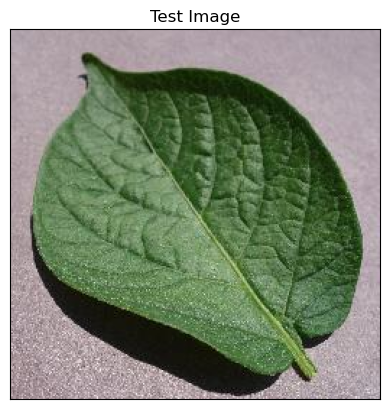

In [32]:
#Test Image Visualization
import cv2
image_path ='test/PotatoHealthy1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [33]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


In [34]:
print(predictions)

[[2.16820695e-09 1.84998716e-09 5.56569547e-11 1.60301515e-05
  2.37293851e-10 2.27660966e-08 3.32182049e-06 1.00920747e-11
  1.70972351e-11 1.86909776e-12 1.09561605e-11 4.67572942e-12
  7.45229989e-11 1.36554882e-11 1.33574393e-11 2.69010231e-10
  3.79015180e-10 6.99334424e-10 1.21497890e-09 6.51226628e-07
  1.02867244e-08 7.67574420e-06 9.99971747e-01 5.79856207e-09
  4.19631419e-07 6.12251829e-12 4.13357933e-12 5.99675190e-08
  3.81415993e-12 2.95907068e-08 3.98401268e-09 8.99982588e-11
  3.28142347e-10 3.23704452e-10 2.50737142e-09 1.23449194e-11
  3.20469241e-11 4.19257989e-10]]


In [35]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

22


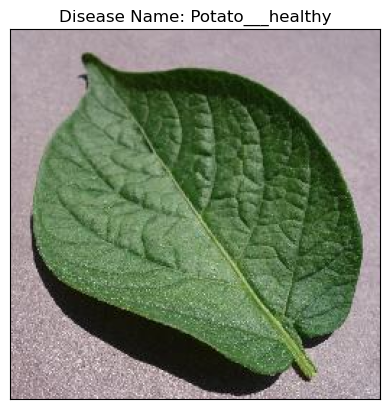

In [36]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()